# Scikit-Learn course 5

# IV. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

1. Estimator's built-in `score()` method :  The metric depends on which model you're using.
<br><br>
2. The scoring parameter : This parameter can be passed to methods such as `cross_val_score()` or `GridSearchCV()` to tell Scikit-Learn to use a specific type of scoring metric.
<br><br>
3. Problem-specific metric functions : Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.
<br><br>
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

## What we gonna see:

![.](images/ML_metrics.webp)

![.](images/regression_metrics.JPG)

![.](images/classification_metrics.png)

## 0. stardards import

In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [10]:
# ---> y (axis=1)
# |
# |
# x (axis=0)

## 1. Fitting a model to the data

In [11]:
from sklearn.ensemble import RandomForestClassifier

# import data 
heart_disease = pd.read_csv("data/heart-disease.csv")

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

## 2. General model evaluation with `score()`

In [12]:
# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.819672131147541

## 3. Evaluating a model using the `scoring` parameter
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

In [13]:
from sklearn .model_selection import cross_val_score
cross_val_score(clf,X,y) # cv=5 (by default) -> cv : cross-validation
# not X_test and y_test
# excepte if you want a validation set
# then cross_val will be between training and validation
# and you still have the test set

array([0.83606557, 0.8852459 , 0.78688525, 0.78333333, 0.78333333])

<strong>
<font color=red>
     not X_test and y_test <br>
     excepte if you want a validation set<br>
     then cross_val will be between training and validation<br>
     and you still have the test set<br>
</font>
</strong>

![](images/sklearn-cross-validation.png)

We've dealt with Figure 1.0 before using score(X_test, y_test). But looking deeper into this, if a model is trained using the training data or 80% of samples, this means 20% of samples aren't used for the model to learn anything.

This also means depending on what 80% is used to train on and what 20% is used to evaluate the model, it may achieve a score which doesn't reflect the entire dataset. For example, if a lot of easy examples are in the 80% training data, when it comes to test on the 20%, your model may perform poorly. The same goes for the reverse.

Figure 2.0 shows 5-fold cross-validation, a method which tries to provide a solution to:

Not training on all the data
Avoiding getting lucky scores on single splits of the data
Instead of training only on 1 training split and evaluating on 1 testing split, 5-fold cross-validation does it 5 times. On a different split each time, returning a score for each.

### 3.1 comparison 

In [14]:
# Single training and test split score : score()
single_score = clf.score(X_test,y_test)

# Take the mean of 5-folf cross-validation score : cross_val_score()
cross_validation_score = np.mean(cross_val_score(clf,X,y))

# Compare the tow
single_score, cross_validation_score

# We prefer the cross_validation_score

(0.819672131147541, 0.8181967213114755)

### 3.2 `scoring` parameter : Classification model evaluation metrics

by default, `scoring` parameter of `cross_val_score` is `None`,
<br>
`scoring` refere to the metric use to evaluate our model 

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy :**

In [15]:
# by default, score() use the mean accuracy as a metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = heart_disease.drop("target", axis=1)
y = heart_disease.target

clf = RandomForestClassifier()
cv_score = cross_val_score(clf, X, y)
cv_score

array([0.81967213, 0.8852459 , 0.80327869, 0.85      , 0.75      ])

In [16]:
f"Heart disease Classifier cross-validated accuracy (mean) : {np.mean(cv_score)*100:.2f}%"
# `.2f` python short-cut to : round(np.mean(cv_score,2))

'Heart disease Classifier cross-validated accuracy (mean) : 82.16%'

**Better :**

In [17]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(5)
clf = RandomForestClassifier()
cv_score = cross_val_score(clf, X, y)
cv_score

array([0.81967213, 0.86885246, 0.81967213, 0.76666667, 0.76666667])

In [18]:
f"Heart disease Classifier cross-validated accuracy (mean) : {np.mean(cv_score)*100:.2f}%"
# `.2f` python short-cut to : round(np.mean(cv_score,2))

'Heart disease Classifier cross-validated accuracy (mean) : 80.83%'

#### 3.2.1 Area under the receiver operating characteristic curve (AUC/ROC) :
<br>
It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic or ROC for short.

**ROC curves are a comparison of true postive rate (tpr) VS false positive rate (fpr).**
* True positive  (TP) = model predicts 1 when truth is 1
* False positive (FP) = model predicts 1 when truth is 0
* True negative  (TN) = model predicts 0 when truth is 0
* False negative (FN) = model predicts 0 when truth is 1

Scikit-Learn lets you calculate the information required for a ROC curve using the `roc_curve` function.

<br>

$TPR = {TP \over TP + FN}$ 
> TP + FN : truth is 1

$FPR = {FP \over TN + FP}$
> TN + FP : truth is 0

In [19]:
from sklearn.metrics import roc_curve

X = heart_disease.drop("target", axis=1)
y = heart_disease.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs_positive = y_probs[:, 1] # take every line ":", take the second term "1" 

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_probs_positive) # thresholds (en) : seuils (fr)

# Check the false positive rate
fpr, tpr

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.07407407, 0.11111111, 0.11111111, 0.22222222,
        0.22222222, 0.25925926, 0.25925926, 0.25925926, 0.33333333,
        0.37037037, 0.37037037, 0.44444444, 0.48148148, 0.51851852,
        0.66666667, 0.7037037 , 0.77777778, 0.81481481, 0.96296296,
        1.        ]),
 array([0.        , 0.05882353, 0.11764706, 0.20588235, 0.26470588,
        0.26470588, 0.32352941, 0.38235294, 0.41176471, 0.47058824,
        0.58823529, 0.58823529, 0.61764706, 0.70588235, 0.70588235,
        0.79411765, 0.79411765, 0.82352941, 0.88235294, 0.88235294,
        0.91176471, 0.94117647, 0.94117647, 0.94117647, 0.97058824,
        0.97058824, 1.        , 1.        , 1.        , 1.        ,
        1.        ]))

**WARNING** : y_true must be {-1,1} or {0,1}. If labels are not either {-1, 1} or {0, 1}, then
    `pos_label` parameters should be explicitly given.
<br>
<font color="red">thresholds (en) : seuils (fr)</font>

**return :**
* **fpr** : Increasing false positive rates such that element `i` is the false positive rate of predictions with score >= `thresholds[i]`.
* **tpr** : Increasing true positive rates such that element `i` is the true positive rate of predictions with score >= `thresholds[i]`
* **thresholds** : Decreasing thresholds on the decision function used to compute
    fpr and tpr. `thresholds[0]` represents no instances being predicted
    and is arbitrarily set to `max(y_score) + 1`.
    

**Plotting the ROC curve**
> An ROC curve plots TPR vs. FPR at different classification thresholds (seuils)

<img src="images/ROCCurve.svg" style="width: 400px;"/>

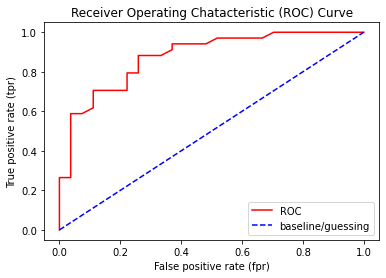

In [20]:
def plotting_ROC_curve(fpr, tpr,baseline=True):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    plt.plot(fpr, tpr, c="red", label="ROC")
    if baseline :
        plt.plot([0,1],[0,1], "--",c="blue", label="baseline/guessing")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Chatacteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plotting_ROC_curve(fpr, tpr)

The main thing to take away here is our model is doing far better than guessing.

A metric you can use to quantify the ROC curve in a single number is AUC (Area Under Curve)-> **Integral**. Scikit-Learn implements a function to caculate this called `roc_auc_score()`.

The maximum ROC AUC score you can achieve is 1.0 and generally, the closer to 1.0, the better the model.
<br>
ie : the red line must be on the top => tpr = 1 => model predict right

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8769063180827886

perferct ROC curve :

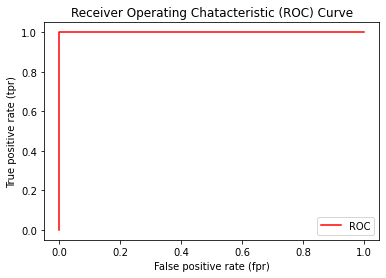

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plotting_ROC_curve(fpr, tpr, False)
# mean no false positive => only true positive

 #### 3.2.2 confusion matrix :
 <br>
 https://en.wikipedia.org/wiki/Confusion_matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict (ie true label). In essence, giving you an idea of where the model is getting confused.

In [23]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)
# diag elements has to be the highter possible
# ex :
# [[27,  7],
# [ 4, 23]]
# here for the first line, 27 have been well predict and 7 not. 
# 7 have been predict to be in the seconde classe, while they are 
# in the first one..
# then those 7 are "False positive" -> FP

# 1st [[27,  7],
# 2nd [ 4, 23]]
#      1st 2nd

# here with heart-disease dataset we have :
# "1st" ~ "0" -> no heart-disease
#"2nd" ~ "1" -> heart-disease

array([[20,  7],
       [ 4, 30]])

In [24]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,
           rownames=["True Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
True Labels,,
0,20,7
1,4,30


![](images/02-anatomy-of-a-confusion-matrix.png)

**Make our confusion matrix more visual with Seaboarn's `heatmap()`**
<br>
First insatall seaboarn on our environement :

!conda env list -> choose the right env <br>
!conda activate path_env <br>
import sys <br>
!conda install --yes --prefix {sys.prefix} seaborn

<AxesSubplot:>

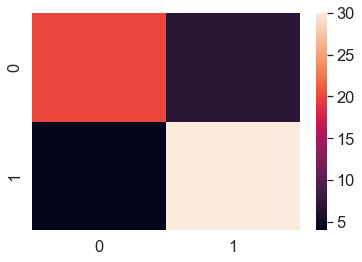

In [25]:
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_matrix)

**Make our confusion matrix more visual with sklearn 1.0+**

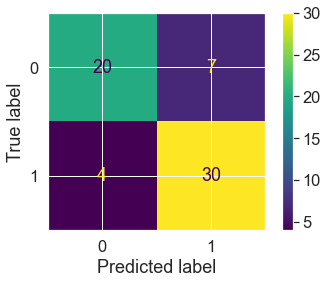

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

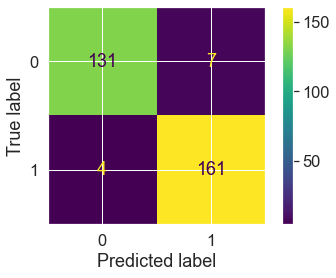

In [27]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

#### 3.2.3 Classification Report

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



![](images/classification_report_anatomy.png)

In [29]:
np.array([[24,  4],[ 2, 31]]) # confusion matrix 

array([[24,  4],
       [ 2, 31]])

* **Precision** : nb_of_TP_or_TN_model / Total_TP_or_TN_prediction ; here : $24\over26$ and $31\over35$            <br> **Precision reduces the rate of False Positif**
<br><br>
* **Recall** : nb_of_TP_or_TN_model / Total_of_real_TP_or_TN ; here : $24\over28$ and $31\over33$                      <br> **Precision reduces the rate of False Negative**
<br><br>
* **F1 score** : mean of "precision" and "recall" ; here : ${{24\over28} + {24\over26}\over 2}$ and ${31\over33} + {31\over35}\over 2$
<br><br>
* **Support** : Total of positive ; here : $24+4 = 28$ and $31 + 2 = 33$
<br><br>
* **Macro avg** : Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
<br><br>
* **Weight avg** :  Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

In this case, you'd want to turn to metrics such as precision, recall and F1 score.

In [30]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## 4. Regression model evaluation metrics

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
<br>
https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/learn/lecture/17690056#content

### The ones we're going to cover are:

1. **R^2 (R-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values range : ]-inf, 1] <br> (EX : if model predict the mean of the target -> R^2 = 0). <br> **close to 1 is better**

$$
R^2 = 
1 - { \sum_{i=1}^n ( y_{true,i} - y_{pred,i} )^2 
\over 
\sum_{i=1}^n ( y_{true,i} - y_{mean} )^2 }
$$

2. **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were : <br> mean(abs(y_true - y_preds))<br> **close to 0 is better**

$$
MAE(y_{true}, y_{preds}) = {1 \over n} 
\cdot 
\sum_{i=1}^{n-1} | y_{true,i} - y_{pred,i}|
$$

3. **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring removes negative errors. It also amplifies outliers (samples which have larger errors) : <br> mean(square(y_true - y_preds))<br> **close to 0 is better**

$$
MSE(y_{true}, y_{preds}) = {1 \over n} 
\cdot 
\sum_{i=1}^{n-1} (y_{true,i} - y_{pred,i})^2
$$

In [31]:
from sklearn.ensemble import RandomForestRegressor

# import data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])

# Make the data 
X = housing_df.drop("target", axis=1)
y = housing_df.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Random Forest Classifier
model = RandomForestRegressor()

# Fit the model to the data (training the machine learning model)
model.fit(X_train, y_train)

# Predict values
y_preds = model.predict(X_test)

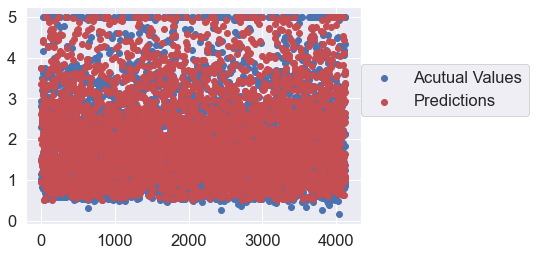

In [32]:
fig, ax = plt.subplots()
x = np.arange(0, len(y_test), 1)
ax.scatter(x, y_test, c='b', label="Acutual Values")
ax.scatter(x, y_preds, c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

### 4.0 Histogram error : 

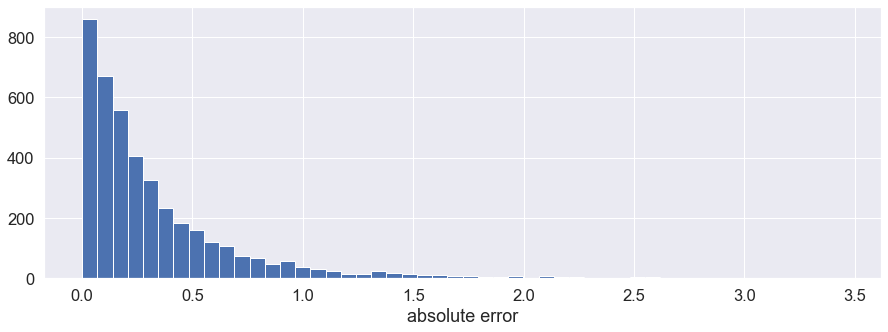

In [62]:
hist_abs_err = np.abs(y_preds - y_test)


fig, ax = plt.subplots(figsize=(15,5))
ax.hist(hist_abs_err, bins=50)
plt.xlabel("absolute error");

### 4.1 evaluation metrics : R^2 (R-squared) or coefficient of determination

**close to 1 is better**

<strong>
<font color=red style="font-size: large">
If R^2 close to 1, it's mean that the error made by the model is lower than the variance of data
</font>
    <br>
if R^2=0.8 , it's mean your model describe 80% of the variation of your data
</strong>



In [33]:
# R^2 by default using score()
model.score(X_test, y_test)

0.8186516589908799

In [34]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_preds)

0.8186516589908799

In [35]:
y_test_mean = np.full(len(y_test), np.mean(y_test))
r2_score(y_test,y_test_mean) # 0

0.0

### 4.2 evaluation metrics : Mean absolute error (MAE)
<br>
in average the predict data is: True_data +- MAE

**close to 0 is better**

In [36]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=y_test,y_pred=y_preds)

0.32309189958817847

In [37]:
np.mean(np.abs(y_test - y_preds))

0.32309189958817863

### 4.3 evaluation metrics : Mean squared error (MSE)

**close to 0 is better**

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_test,y_pred=y_preds)

0.2393627974026446

In [39]:
np.mean(np.square(y_test - y_preds))

0.23936279740264435

## 5. Using the `scoring` parameter
<br>
https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values

**Let's check it out with our classification model and the heart disease dataset.**

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

# cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, scoring=None) 
# scoring=None => use the default evaluation metrics 
# Here : the mean accuracy on the given test data and labels
np.mean(cv_acc)

0.8016393442622951

In [41]:
np.mean(cross_val_score(clf, X, y, scoring="accuracy"))

0.8315300546448088

In [42]:
np.mean(cross_val_score(clf, X, y, scoring="precision"))

0.8297957347299452

In [43]:
np.mean(cross_val_score(clf, X, y, scoring="recall"))

0.8666666666666666

**We can repeat this process with our REGRESSION metrics.**

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

cv_acc = cross_val_score(model, X, y, scoring="r2") #r2 by default
np.mean(cv_acc)

0.6525761254236985

In [45]:
cv_mae = cross_val_score(model, 
                         X, 
                         y, 
                         scoring="neg_mean_squared_error")
np.mean(cv_mae) # close to 0 is better

-0.42894798568038855

In [46]:
cv_mse = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
np.mean(cv_mse) # close to 0 is better

-0.4658759401937986

Why the "neg_" ? Because Scikit-Learn documentation states :
> https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values

Which in this case, means a lower negative value (closer to 0) is better.

## 6. Using different evaluation metrics as Scikit-Learn functions

**Classification functions**

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1: {f1_score(y_test, y_preds)*100:.2f}%")


Classifier metrics on the test set
Accurracy: 73.77%
Precision: 71.88%
Recall: 76.67%
F1: 74.19%


**Regression functions**

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)*100:.2f}%")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression metrics on the test set
R2 score: 79.47%
MAE: 0.33
MSE: 0.26


In [49]:
# 6h04